<a href="https://colab.research.google.com/github/GenoKiller777/PythonMyFirstNeuronalNetwork/blob/main/ANN_Titanic_DarwinPerez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titanic.csv to titanic.csv
User uploaded file "titanic.csv" with length 61194 bytes


# ANN - Clasificación Titanic

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lectura de Datos

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Limpieza de Datos

In [6]:
df[['Age']] = df[['Age']].fillna(value=df[['Age']].mean())
df[['Fare']] = df[['Fare']].fillna(value=df[['Fare']].mean())
df[['Embarked']] = df[['Embarked']].fillna(value=df['Embarked'].value_counts().idxmax())

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Planteamiento del modelo

In [8]:
X = df[['Age','Sex','Fare','Pclass', 'SibSp',	'Parch']]
y = df['Survived']

## Preprocesamiento

Haremos lo siguiente:


*   Binarización
*   Escalamiento
*   Hot encoding Y



### Variables Dummy (binarización)

In [18]:
X = pd.get_dummies(X, drop_first=True)

### Escalamiento

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_enc = scaler.fit_transform(X)

In [25]:
X_enc[:2]

array([[-0.5924806 , -0.50244517,  0.82737724,  0.43279337, -0.47367361,
         0.73769513],
       [ 0.63878901,  0.78684529, -1.56610693,  0.43279337, -0.47367361,
        -1.35557354]])

### One hot Y

In [11]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [13]:
y_enc = enc.fit_transform(y.values.reshape(-1,1)).toarray()

In [15]:
y_enc[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

### Validacion Cruzada

In [19]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.33, random_state=42)

### Arquitectura de la red neuronal

La arquitectura es un arte. En este caso, utilizaremos capas densas (fully connected)

*  Probar con activation: relu, tanh, linear
*  Probar optimizadores: Adam, SGD, RMSProp, Adagrad
*  Probar combinaciones de capas

In [28]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [91]:
model = Sequential()
model.add(Input(shape = (6,)))
model.add(Dense(20, activation ='linear'))
model.add(Dense(10, activation = 'linear'))
model.add(Dense(2, activation = 'softmax'))

In [92]:
from sklearn import metrics
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

### Visualización del modelo

In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                140       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 372
Trainable params: 372
Non-trainable params: 0
_________________________________________________________________


In [94]:
from tensorflow.keras.utils import plot_model

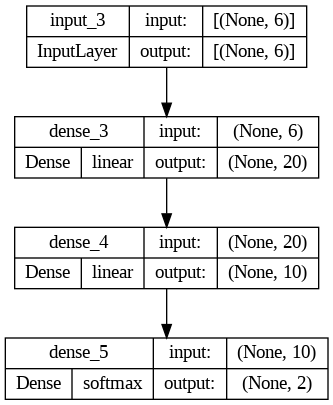

In [95]:
plot_model(model, show_shapes = True, show_layer_activations = True)

### Entrenamiento

In [96]:
history = model.fit(X_train, y_train, batch_size= 128, epochs=50,
                    validation_data = (X_test,y_test))

Epoch 1/50
5/5 [==============================] - 0s 36ms/step - loss: 0.9975 - accuracy: 0.3087 - val_loss: 0.9488 - val_accuracy: 0.3220
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.8958 - accuracy: 0.3742 - val_loss: 0.8592 - val_accuracy: 0.3729
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.8179 - accuracy: 0.4362 - val_loss: 0.7876 - val_accuracy: 0.4983
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.7550 - accuracy: 0.5403 - val_loss: 0.7299 - val_accuracy: 0.5695
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 0.7049 - accuracy: 0.6040 - val_loss: 0.6852 - val_accuracy: 0.6305
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6656 - accuracy: 0.6493 - val_loss: 0.6492 - val_accuracy: 0.6576
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6348 - accuracy: 0.6846 - val_loss: 0.6195 - val_accuracy: 0.6678
Epoch 8/50
5/5 [==============

## Evaluación

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [99]:
y_pred[:5]

array([[0.90626025, 0.09373974],
       [0.766098  , 0.23390198],
       [0.8384486 , 0.16155142],
       [0.14091304, 0.85908693],
       [0.33745623, 0.6625437 ]], dtype=float32)

In [100]:
y_test[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [101]:
y_pred_clase = np.argmax(y_pred, axis=1)

In [102]:
y_test_clase = np.argmax(y_test, axis=1)

In [103]:
accuracy_score(y_pred_clase,y_test_clase)

0.8067796610169492

## Evolución del entrenamiento

In [55]:
import matplotlib.pyplot as plt

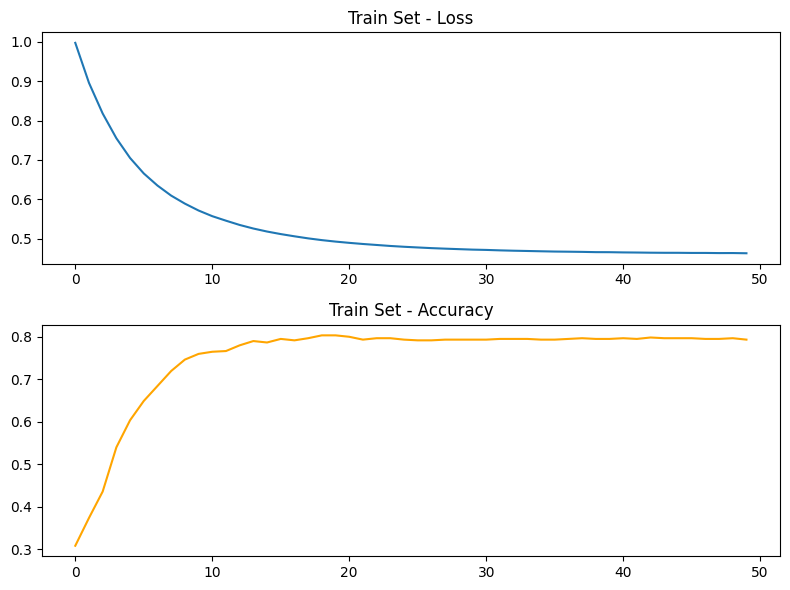

In [109]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title('Train Set - Loss')
plt.plot(history.history['loss'])
plt.subplot(2,1,2)
plt.title('Train Set - Accuracy')
plt.plot(history.history['accuracy'],color ='orange')

plt.tight_layout()
plt.show()

In [ ]:
# validation set


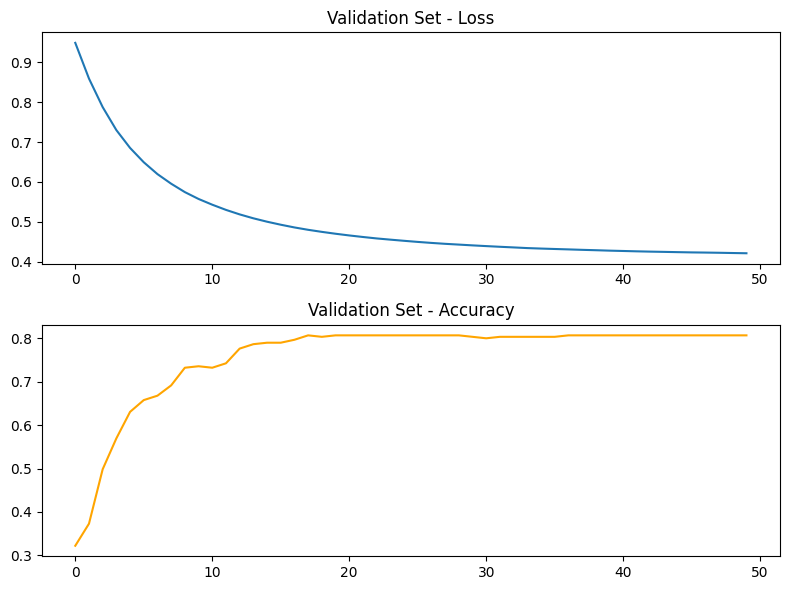

In [111]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title('Validation Set - Loss')
plt.plot(history.history['val_loss'])
plt.subplot(2,1,2)
plt.title('Validation Set - Accuracy')
plt.plot(history.history['val_accuracy'],color ='orange')

plt.tight_layout()
plt.show()